In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
import sys
sys.path.insert(1, '/home/sypmauu/GalapagosProject/scripts/functions')
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


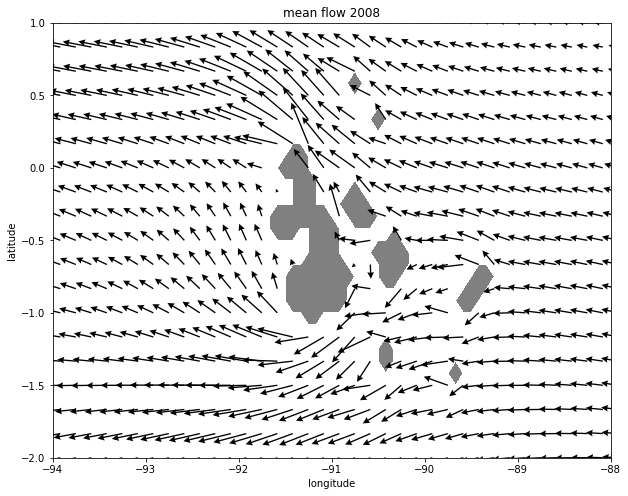

In [2]:
NEMOdata = np.load('meanfields2008_NEMO.npz')
lon = NEMOdata['lon_NEMO']
lat = NEMOdata['lat_NEMO']
Tvel = NEMOdata['Tmean_NEMO']
Uvel = NEMOdata['Umean_NEMO']
Vvel = NEMOdata['Vmean_NEMO']
Tvel[Tvel==0]=nan
Uvel[Uvel==0]=nan
Vvel[Vvel==0]=nan


map_extent = [-94,-88,-2,1]
figsize=(10, 8)
Tmin=60
Tmax=70                              
dq=2
headwidth=5
headlength=5
scale=1.5

fig, ax = plt.subplots(figsize=figsize)

levels = np.linspace(Tmin, Tmax, 41)
fig = ax.contourf(lon,lat,Tvel,       
                 levels = levels,    
                 cmap='Greys',       
                 extend='both',      
                 origin='lower')     
ax.set_title('mean flow 2008')          
ax.set_xlabel('longitude')                 
ax.set_ylabel('latitude') 
ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])
ax.set_facecolor('gray')
#cbar = plt.colorbar(fig, ax=ax)
#cbar.ax.set_ylabel('SST (\xb0C)')

if lat.ndim == 1:
    ax.quiver(lon[0::dq],lat[0::dq],
                  Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
                  headwidth=headwidth,
                  headlength=headlength,
                  scale_units='xy',
                  angles='xy',
                  scale=scale)
    
elif lat.ndim == 2:
    ax.quiver(lon[0::dq,0::dq],lat[0::dq,0::dq],
                  Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
                  headwidth=headwidth,
                  headlength=headlength,
                  scale_units='xy',
                  angles='xy',
                  scale=scale) 

plt.savefig('/home/sypmauu/GalapagosProject/results/figures/NEMO_quiver_2008mean_zoomin.pdf')

In [ ]:
# compare SST and velocity fields, make and save plot

MITdata = np.load('meanfields2008_MIT.npz')
NEMOdata = np.load('meanfields2008_NEMO.npz')
CMEMSdata = np.load('meanfields2008_CMEMS.npz')

figsize=(15,4)
map_extent = [-105,-75,-10,10]
Tmin=20
Tmax=30
headwidth=5
headlength=7
scale=0.7
levels = np.linspace(Tmin, Tmax, 41)

# figure set-up
fig, axs = plt.subplots(1, 3, figsize=figsize, 
                              sharex = True, 
                              sharey = True)
fig.subplots_adjust(hspace=.5, wspace=.1)
axs = axs.ravel()
fig.text(0.5, 0.03, 'longitude', ha='center', va='center')
fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

# fig MITgcm 
lon = MITdata['lon_MIT']
lat = MITdata['lat_MIT']
Tvel = MITdata['Tmean_MIT']
Uvel = MITdata['Umean_MIT']
Vvel = MITdata['Vmean_MIT']
dq = 26

im = axs[0].contourf(lon,lat,Tvel,       
                     levels = levels,    
                     cmap='Spectral_r',       
                     extend='both',      
                     origin='lower')     
axs[0].set_title('MITgcm-4km')          
axs[0].set_xlim(map_extent[0:2])
axs[0].set_ylim(map_extent[2:4])
axs[0].set_facecolor('gray')
  
axs[0].quiver(lon[0::dq],lat[0::dq],
              Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
              headwidth=headwidth,
              headlength=headlength,
              scale_units='xy',
              angles='xy',
              scale=scale)

# fig NEMO
lon = NEMOdata['lon_NEMO']
lat = NEMOdata['lat_NEMO']
Tvel = NEMOdata['Tmean_NEMO']
Uvel = NEMOdata['Umean_NEMO']
Vvel = NEMOdata['Vmean_NEMO']
Tvel[Tvel==0]=nan
Uvel[Uvel==0]=nan
Vvel[Vvel==0]=nan
dq = 12

im = axs[1].contourf(lon,lat,Tvel,       
                     levels = levels,    
                     cmap='Spectral_r',       
                     extend='both',      
                     origin='lower')     
axs[1].set_title('NEMO 1/12\xb0')          
axs[1].set_xlim(map_extent[0:2])
axs[1].set_ylim(map_extent[2:4])
axs[1].set_facecolor('gray')
  
axs[1].quiver(lon[0::dq,0::dq],lat[0::dq,0::dq],
              Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
              headwidth=headwidth,
              headlength=headlength,
              scale_units='xy',
              angles='xy',
              scale=scale)

# fig CMEMS
lon = CMEMSdata['lon_CMEMS']
lat = CMEMSdata['lat_CMEMS']
Tvel = CMEMSdata['Tmean_CMEMS']
Uvel = CMEMSdata['Umean_CMEMS']
Vvel = CMEMSdata['Vmean_CMEMS']
dq = 12

im = axs[2].contourf(lon,lat,Tvel,       
                     levels = levels,    
                     cmap='Spectral_r',       
                     extend='both',      
                     origin='lower')     
axs[2].set_title('CMEMS reanalysis')          
axs[2].set_xlim(map_extent[0:2])
axs[2].set_ylim(map_extent[2:4])
axs[2].set_facecolor('gray')
  
axs[2].quiver(lon[0::dq],lat[0::dq],
              Uvel[0::dq,0::dq],Vvel[0::dq,0::dq],
              headwidth=headwidth,
              headlength=headlength,
              scale_units='xy',
              angles='xy',
              scale=scale)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel('SST (\xb0C)')
plt.savefig('meanfields2008.pdf')
plt.savefig('meanfields2008.png')

In [ ]:
# plot starting position of particles

bathy_file = '/home/sypmauu/GalapagosProject/data/MIT4km/RGEMS3_Surf_grid.nc'
dfile = Dataset(bathy_file)
bathy = dfile.variables['Depth'][:]
lat = dfile.variables['YG'][:]
lon = dfile.variables['XG'][:]

landmask = bathy[:]
landmask = np.where(landmask<1, 0, landmask)
landmask = np.where(landmask>=1, 1, landmask)
bathy = np.where(bathy<1, nan, bathy)

# load particle data
namefile = '/home/sypmauu/GalapagosProject/results/data_output/galapagosparticles_bwd_4km_2008.nc'
Traj_MITbwd = ReadTrajectories(namefile)

plon = Traj_MITbwd['lon'][0:154,0]
plat = Traj_MITbwd['lat'][0:154,0]

# plot starting position
map_extent = [-93,-88,-2,1.5]
fig, ax = plt.subplots(figsize=(10,8))
        
levels = np.linspace(0, 4500, 41)
fig = ax.contourf(lon,lat,bathy,       
                  levels = levels,    
                  cmap='bone',       
                  extend='both',      
                  origin='lower')     
ax.set_title('starting position particles')          
ax.set_xlabel('longitude')                 
ax.set_ylabel('latitude') 
ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])
ax.set_facecolor('gray')
cbar = plt.colorbar(fig, ax=ax)
cbar.ax.set_ylabel('depth (m)')
    
ax.scatter(plon, plat,color='r')   
plt.savefig('startingposition.pdf')
plt.savefig('startingposition.png')

In [ ]:
# compare density distribution of particles

bins = [np.arange(-97,-74, 1), np.arange(-10, 11, 1)]
vmax = 0.5
levels = np.linspace(0, 1, 20)

bathy_file = '/home/sypmauu/GalapagosProject/data/MIT4km/RGEMS3_Surf_grid.nc'
dfile = Dataset(bathy_file)
bathy = dfile.variables['Depth'][:]
lat = dfile.variables['YG'][:]
lon = dfile.variables['XG'][:]
landmask = bathy[:]
landmask = np.where(landmask<1, 0, landmask)
landmask = np.where(landmask>=1, 1, landmask)
bathy = np.where(bathy<1, nan, bathy)
landmask=landmask*1.0
landmask[landmask==1]=nan

# figure set-up
fig, axs = plt.subplots(1, 2, figsize=(15,6), 
                              sharex = True, 
                              sharey = True)
fig.subplots_adjust(hspace=.5, wspace=.1)
axs = axs.ravel()
fig.text(0.5, 0.03, 'longitude', ha='center', va='center')
fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

# fig1 NEMO
namefile = '/home/sypmauu/GalapagosProject/results/data_output/galapagosparticles_bwd_nemo_2008.nc'
Traj = ReadTrajectories(namefile)
plat = Traj['lat'][:]
plon = Traj['lon'][:]

pmap = np.zeros([len(bins[0])-1,len(bins[1])-1], dtype=float)
for particle in range (len(plon)):
    plonn = plon[particle,:]
    platt = plat[particle,:]
    H, xe, ye = np.histogram2d(plonn[~isnan(plonn)],platt[~np.isnan(platt)], bins=bins)
    H[H > 0]=1
    pmap += H    
pmap=pmap/len(plon)
pmap[pmap==0]=nan

im = axs[0].pcolor(bins[0][:-1],bins[1][:-1],pmap.T,           
                  cmap='GnBu',
                  vmin=0,
                  vmax=vmax)    
axs[0].set_title('NEMO 1/12\xb0')          
axs[0].contourf(lon, lat, landmask, cmap='Greys_r', levels=levels)
axs[0].set_xlim(bins[0][0],bins[0][-1])
axs[0].set_ylim(bins[1][0],bins[1][-1])


#fig2 MITbwd
namefile = '/home/sypmauu/GalapagosProject/results/data_output/galapagosparticles_bwd_4km_2008.nc'
Traj = ReadTrajectories(namefile)
plat = Traj['lat'][:]
plon = Traj['lon'][:]

pmap = np.zeros([len(bins[0])-1,len(bins[1])-1], dtype=float)
for particle in range (len(plon)):
    plonn = plon[particle,:]
    platt = plat[particle,:]
    H, xe, ye = np.histogram2d(plonn[~isnan(plonn)],platt[~np.isnan(platt)], bins=bins)
    H[H > 0]=1
    pmap += H    
pmap=pmap/len(plon)
pmap[pmap==0]=nan

im = axs[1].pcolor(bins[0][:-1],bins[1][:-1],pmap.T,           
                  cmap='GnBu',
                  vmin=0,
                  vmax=vmax)    
axs[1].set_title('MITgcm-4km')          
axs[1].contourf(lon, lat, landmask, cmap='Greys_r', levels=levels)
axs[1].set_xlim(bins[0][0],bins[0][-1])
axs[1].set_ylim(bins[1][0],bins[1][-1])


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel('particle probability')
plt.savefig('probability_bwd.pdf')
plt.savefig('probability_bwd.png')

In [ ]:
# compare density distribution of particles stokes and humbolt

bins = [np.arange(-97,-74, 1), np.arange(-10, 11, 1)]
vmax = 0.5
levels = np.linspace(0, 1, 20)

bathy_file = '/home/sypmauu/GalapagosProject/data/MIT4km/RGEMS3_Surf_grid.nc'
dfile = Dataset(bathy_file)
bathy = dfile.variables['Depth'][:]
lat = dfile.variables['YG'][:]
lon = dfile.variables['XG'][:]
landmask = bathy[:]
landmask = np.where(landmask<1, 0, landmask)
landmask = np.where(landmask>=1, 1, landmask)
bathy = np.where(bathy<1, nan, bathy)
landmask=landmask*1.0
landmask[landmask==1]=nan

# figure set-up
fig, axs = plt.subplots(1, 2, figsize=(15,6), 
                              sharex = True, 
                              sharey = True)
fig.subplots_adjust(hspace=.5, wspace=.1)
axs = axs.ravel()
fig.text(0.5, 0.03, 'longitude', ha='center', va='center')
fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

# fig1 NEMO
namefile = '/home/sypmauu/GalapagosProject/results/data_output/galapagosparticles_bwd_4km_2008_wstokes.nc'
Traj = ReadTrajectories(namefile)
plat = Traj['lat'][:]
plon = Traj['lon'][:]

pmap = np.zeros([len(bins[0])-1,len(bins[1])-1], dtype=float)
for particle in range (len(plon)):
    plonn = plon[particle,:]
    platt = plat[particle,:]
    H, xe, ye = np.histogram2d(plonn[~isnan(plonn)],platt[~np.isnan(platt)], bins=bins)
    H[H > 0]=1
    pmap += H    
pmap=pmap/len(plon)
pmap[pmap==0]=nan

im = axs[0].pcolor(bins[0][:-1],bins[1][:-1],pmap.T,           
                  cmap='GnBu',
                  vmin=0,
                  vmax=vmax)    
axs[0].set_title('MITgcm-4km with stokes drift')          
axs[0].contourf(lon, lat, landmask, cmap='Greys_r', levels=levels)
axs[0].set_xlim(bins[0][0],bins[0][-1])
axs[0].set_ylim(bins[1][0],bins[1][-1])


#fig2 MITbwd
namefile = '/home/sypmauu/GalapagosProject/results/data_output/galapagosparticles_forward_4km_humbolt.nc'
Traj = ReadTrajectories(namefile)
plat = Traj['lat'][:]
plon = Traj['lon'][:]

pmap = np.zeros([len(bins[0])-1,len(bins[1])-1], dtype=float)
for particle in range (len(plon)):
    plonn = plon[particle,:]
    platt = plat[particle,:]
    H, xe, ye = np.histogram2d(plonn[~isnan(plonn)],platt[~np.isnan(platt)], bins=bins)
    H[H > 0]=1
    pmap += H    
pmap=pmap/len(plon)
pmap[pmap==0]=nan

im = axs[1].pcolor(bins[0][:-1],bins[1][:-1],pmap.T,           
                  cmap='GnBu',
                  vmin=0,
                  vmax=vmax)    
axs[1].set_title('MITgcm-4km forward run Humbolt current')          
axs[1].contourf(lon, lat, landmask, cmap='Greys_r', levels=levels)
axs[1].set_xlim(bins[0][0],bins[0][-1])
axs[1].set_ylim(bins[1][0],bins[1][-1])
axs[1].hlines(-5,-85,-80,color='grey',linewidth=10)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel('particle probability')
plt.savefig('probability_stokes.pdf')
plt.savefig('probability_stokes.png')